# Performance Evaluation

In this notebook we compare recomendations based on the embedding similarity match with recomendations based on user correlation. The later is just a reference. We don't have the "correct" similars to measure performance properly. In an e-commerce, for example, we compare algorithms using A/B testing with business metrics like CTR and conversion. The better the business metric, the better the recommendation approach.

In [39]:
import pandas as pd
import numpy as np
from plotnine import *

from src.evaluation import spearman_corr, precision_recall

## Ranking Correlation

In the Similarity Match notebook we have computed the cosine similarity between pairs of movies. Now, we will compare the user correlation ranking with the cosine similarity ranking based from the embedding features. In addition, we will check if the embedding features carries any type of popularity bias.

The Spearman Ranking Correlation Coefficient will give us a value between -1 (exactly opposite order) and +1 (same order). Like the classical Pearson's Correlation Coefficient, values above 0.3 can be seen as an evidence of correlation.

For each target movie we will compute the correlation between the user similarity ranking and the cosine similarity ranking. Then, we will evaluate the distribution of the correlation measures.

In [40]:
ratings = pd.read_csv('data/movie_ratings.csv')
ratings['like'] = np.where(ratings['rating'] >= 3.5, 1.0, 0.0)
ratings = ratings.groupby('id').agg(
    num_votes=('user', 'count'),
    num_likes=('like', 'sum'),
    avg_rating=('rating', 'mean')
)
ratings.head()

,num_votes,num_likes,avg_rating
id,,,
1,68410,50939.0,3.886508
2,27138,12345.0,3.246499
3,15579,5861.0,3.173792
4,2989,848.0,2.874540
5,15466,5064.0,3.077169


### Ranking with Text Embedding

In [41]:
tfidf_ranking = pd.read_csv('output/movie_ranking_tfidf.csv')
tfidf_ranking.head()

,id_right,similarity,id_left,target
0,4886,0.433568,2,0.235485
1,110,0.401254,2,0.242349
2,4306,0.387088,2,0.240394
3,1097,0.383907,2,0.233132
4,1291,0.352362,2,0.232228


In [42]:
tfidf_corr = spearman_corr(tfidf_ranking, 'similarity', 'target', 'id_left')
tfidf_corr = tfidf_corr.join(ratings, how='inner')
tfidf_corr.head()

,corr,num_votes,num_likes,avg_rating
2,-0.127273,27138,12345.0,3.246499
21,-0.515152,25699,14913.0,3.568368
34,-0.054545,35900,21916.0,3.613858
50,-0.187879,62129,55297.0,4.292038
62,-0.163636,23348,14857.0,3.746595


<AxesSubplot:ylabel='Frequency'>

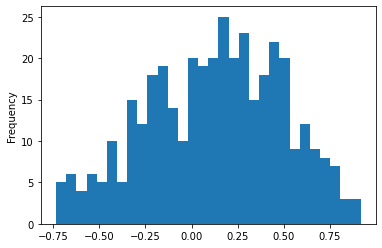

In [43]:
tfidf_corr['corr'].plot.hist(bins=30)

For the greatest part of the target movies we have a positive rankling correlation.

In [44]:
tfidf_corr['corr'].describe()

count    382.000000
mean       0.122926
std        0.369945
min       -0.733333
25%       -0.151515
50%        0.151515
75%        0.406061
max        0.915152
Name: corr, dtype: float64

<AxesSubplot:xlabel='corr', ylabel='num_votes'>

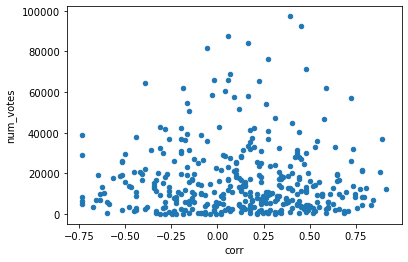

In [45]:
tfidf_corr.plot.scatter(x='corr', y='num_votes')

From this scatter plot we can see that there is no popularity bias in the model performance.

### Ranking with Content Embedding (Text + Crew)

In [46]:
tfidf_crew_ranking = pd.read_csv('output/movie_ranking_tfidf_crew.csv')
tfidf_crew_ranking.head()

,id_right,similarity,id_left,target
0,6377,0.382239,2,0.229354
1,4306,0.336810,2,0.240394
2,364,0.310683,2,0.335812
3,1097,0.279052,2,0.233132
4,4886,0.272782,2,0.235485


In [47]:
tfidf_crew_corr = spearman_corr(tfidf_crew_ranking, 'similarity', 'target', 'id_left')
tfidf_crew_corr = tfidf_crew_corr.join(ratings, how='inner')
tfidf_crew_corr.head()

,corr,num_votes,num_likes,avg_rating
2,-0.066667,27138,12345.0,3.246499
21,0.272727,25699,14913.0,3.568368
34,-0.066667,35900,21916.0,3.613858
50,-0.248485,62129,55297.0,4.292038
62,-0.212121,23348,14857.0,3.746595


<AxesSubplot:ylabel='Frequency'>

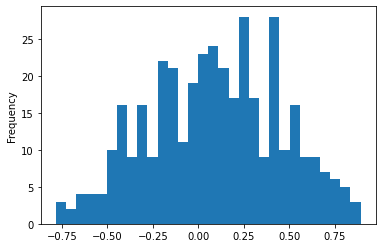

In [48]:
tfidf_crew_corr['corr'].plot.hist(bins=30)

We can see that the number of movies with correlation above 0.25 decreased.

In [49]:
tfidf_crew_corr['corr'].describe()

count    382.000000
mean       0.091607
std        0.361220
min       -0.781818
25%       -0.175758
50%        0.090909
75%        0.369697
max        0.890909
Name: corr, dtype: float64

<AxesSubplot:xlabel='corr', ylabel='num_votes'>

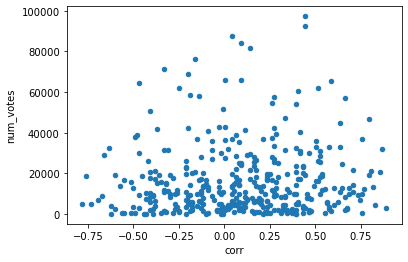

In [50]:
tfidf_crew_corr.plot.scatter(x='corr', y='num_votes')

Again, popularity bias is not observed.

### Ranking with Content Embedding (Text + Crew + Cast)

In [51]:
tfidf_crew_cast_ranking = pd.read_csv('output/movie_ranking_tfidf_crew_cast.csv')
tfidf_crew_cast_ranking.head()

,id_right,similarity,id_left,target
0,4306,0.384327,2,0.240394
1,2716,0.223461,2,0.222825
2,364,0.164086,2,0.335812
3,736,0.158615,2,0.256185
4,2011,0.147242,2,0.248665


In [52]:
tfidf_crew_cast_corr = spearman_corr(tfidf_crew_cast_ranking, 'similarity', 'target', 'id_left')
tfidf_crew_cast_corr = tfidf_crew_cast_corr.join(ratings, how='inner')
tfidf_crew_cast_corr.head()

,corr,num_votes,num_likes,avg_rating
2,-0.175758,27138,12345.0,3.246499
21,0.454545,25699,14913.0,3.568368
34,-0.248485,35900,21916.0,3.613858
50,0.248485,62129,55297.0,4.292038
62,-0.406061,23348,14857.0,3.746595


<AxesSubplot:ylabel='Frequency'>

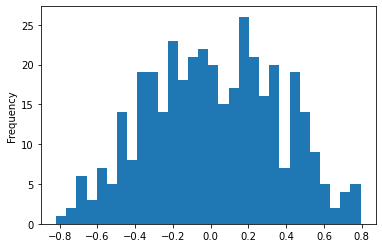

In [53]:
tfidf_crew_cast_corr['corr'].plot.hist(bins=30)

We can see that the number of movies with negative correlation increased.

In [54]:
tfidf_crew_cast_corr['corr'].describe()

count    382.000000
mean       0.019959
std        0.344919
min       -0.818182
25%       -0.236364
50%        0.012121
75%        0.281818
max        0.793939
Name: corr, dtype: float64

<AxesSubplot:xlabel='corr', ylabel='num_votes'>

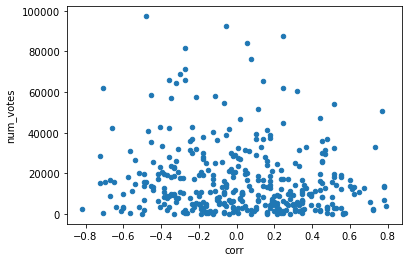

In [55]:
tfidf_crew_cast_corr.plot.scatter(x='corr', y='num_votes')

No popularity bias is present.

### Ranking with Collaborative Filtering Embedding

In [56]:
cb_ranking = pd.read_csv('output/movie_ranking_cb.csv')
cb_ranking.head()

,id_right,similarity,id_left,target
0,253,0.343631,2,0.237054
1,110,0.289399,2,0.242349
2,2011,0.279259,2,0.248665
3,165,0.244945,2,0.234542
4,1097,0.237925,2,0.233132


In [57]:
cb_corr = spearman_corr(cb_ranking, 'similarity', 'target', 'id_left')
cb_corr = cb_corr.join(ratings, how='inner')
cb_corr.head()

,corr,num_votes,num_likes,avg_rating
2,-0.393939,27138,12345.0,3.246499
21,0.115152,25699,14913.0,3.568368
34,-0.151515,35900,21916.0,3.613858
50,-0.236364,62129,55297.0,4.292038
62,0.090909,23348,14857.0,3.746595


<AxesSubplot:ylabel='Frequency'>

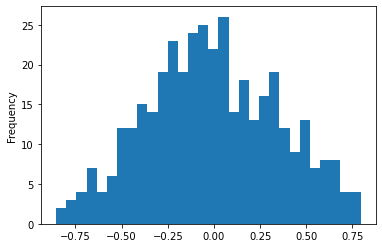

In [58]:
cb_corr['corr'].plot.hist(bins=30)

We see more negative values than positive ones. It's a surprise, since collaborative filtering learns user interactions. We are expecting a result more correlated with the ranking by user similarity. One reason could be the inclusion of negative interactions (dislikes) in the collaborative filtering factorization.

In [59]:
cb_corr['corr'].describe()

count    382.000000
mean      -0.007711
std        0.354699
min       -0.854545
25%       -0.260606
50%       -0.018182
75%        0.269697
max        0.793939
Name: corr, dtype: float64

<AxesSubplot:xlabel='corr', ylabel='num_votes'>

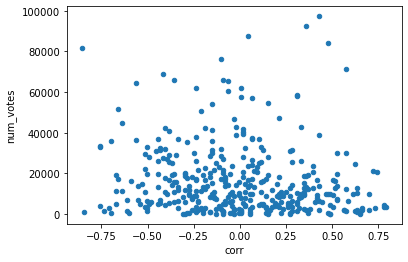

In [60]:
cb_corr.plot.scatter(x='corr', y='num_votes')

No popularity bias was found, indicating that the bias term in factorization algorithm was fitted properly.

### Comparing Ranking Performance

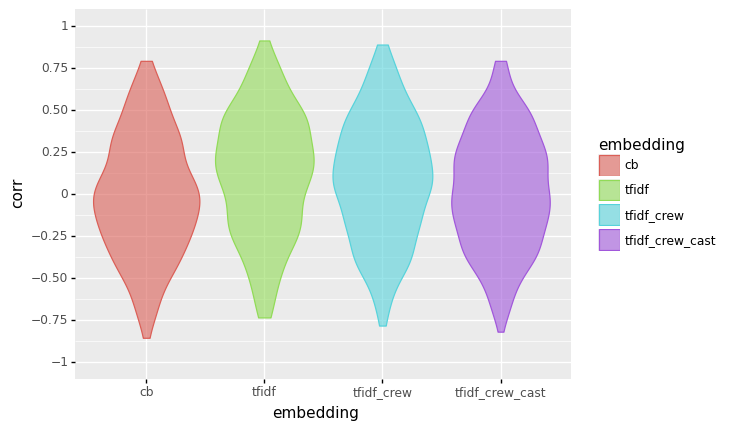

In [61]:
tfidf_corr['embedding'] = 'tfidf'
tfidf_crew_corr['embedding'] = 'tfidf_crew'
tfidf_crew_cast_corr['embedding'] = 'tfidf_crew_cast'
cb_corr['embedding'] = 'cb'

cols = ['embedding', 'corr']
dfs = [tfidf_corr[cols], tfidf_crew_corr[cols], tfidf_crew_cast_corr[cols], cb_corr[cols]]
corr = pd.concat(dfs, ignore_index=True).dropna()
corr['embedding'] = corr['embedding'].astype('category')

g = ggplot(corr, aes(x='embedding', y='corr', color='embedding', fill='embedding')) +\
    geom_violin(alpha=0.6) +\
    scale_y_continuous(breaks=[-1.0, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1.0], limits=[-1, 1])
g = g.draw()

We can observe that text embedding performed a little bit better, but there is a large overlapping between the distributions. So, there is no strong evidence of difference between methods.

<AxesSubplot:xlabel='cb_corr', ylabel='tfidf_corr'>

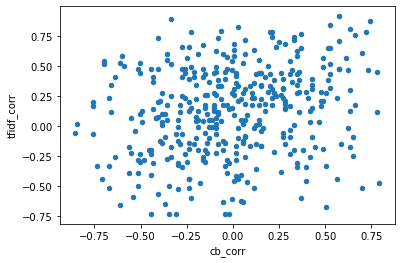

In [62]:
tfidf_cb_corr = tfidf_corr[['corr']].rename(columns={'corr':'tfidf_corr'}).join(
    cb_corr[['corr']].rename(columns={'corr':'cb_corr'}), how='inner'
)
tfidf_cb_corr.plot.scatter(x='cb_corr', y='tfidf_corr')

In addition, we can observe that there is no strong correlation between text embedding and collaborative filtering embedding. It may be a indicative that both methods are complementary. So, combining than can provide a even better performance.

<AxesSubplot:xlabel='tfidf_corr', ylabel='tfidf_crew_corr'>

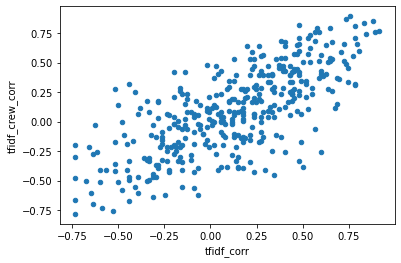

In [63]:
content_corr = tfidf_corr[['corr']].rename(columns={'corr':'tfidf_corr'}).join(
    tfidf_crew_corr[['corr']].rename(columns={'corr':'tfidf_crew_corr'}), how='inner'
)
content_corr.plot.scatter(x='tfidf_corr', y='tfidf_crew_corr')

If we compare content based methods, we observe a stronger correlation. Let's check it numerically:

In [65]:
from scipy.stats import pearsonr

pearsonr(tfidf_cb_corr['tfidf_corr'], tfidf_cb_corr['cb_corr'])

(0.2214131380567743, 1.2560464682861095e-05)

In [67]:
pearsonr(content_corr['tfidf_corr'], content_corr['tfidf_crew_corr'])

(0.7216452817938481, 1.1361322483897958e-62)

## Precision and Recall at K

Another way to check ranking performance is to transform the problem into a classical binary classification problem, so that we can take advantage of better known metrics. Precision and recall are the most common ones.

First of all we must label some items as 'relevant'. Than, we look for relavant items in the top K positions of the ranking. K in [5,10] are common choices. Here we will choose k=10.

Precision is given by the number of relevant items in the top K divided by K. In other words, it measures the proportion of the top K items that are relevant. Recall is given by the number of relevant items in the top K divided by the total number of relevant items. In other words, it measures the proportion of relevant items that are in the top K items.

### Defining Relevant Items

In [25]:
movie_sim = pd.read_csv('output/movie_similarity.csv', usecols=['id_left','id_right','similarity'])
movie_sim.head()

,id_left,id_right,similarity
0,2,364,0.335812
1,2,480,0.317939
2,2,367,0.314605
3,2,588,0.298155
4,2,589,0.263034


<AxesSubplot:ylabel='Frequency'>

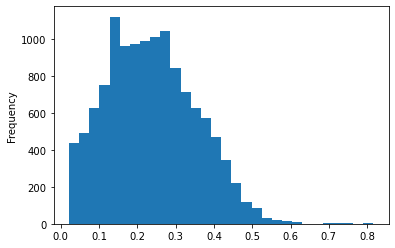

In [26]:
movie_sim['similarity'].plot.hist(bins=30)

We can define a threshold for the user correlation similarity to label items as relevant or not.

<AxesSubplot:ylabel='Frequency'>

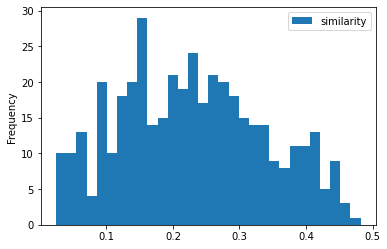

In [27]:
movie_sim.groupby('id_left').agg(
    similarity=('similarity', lambda x: x.quantile(0.5))
).plot.hist(bins=30)

<AxesSubplot:ylabel='Frequency'>

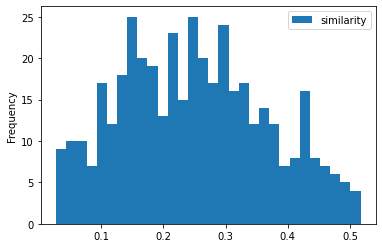

In [28]:
movie_sim.groupby('id_left').agg(
    similarity=('similarity', lambda x: x.quantile(0.75))
).plot.hist(bins=30)

Here we will user 0.3 as the threshold, so that movies with user correlation greater than or equal 0.3 will be considered relevant similars to the target movie.

In [29]:
movie_sim['relevant'] = np.where(movie_sim['similarity'] >= 0.3, 1.0, 0.0)

<AxesSubplot:ylabel='Frequency'>

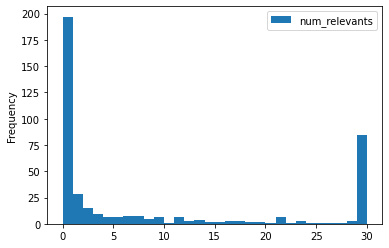

In [30]:
movie_sim.groupby('id_left').agg(
    num_relevants=('relevant', 'sum')
).plot.hist(bins=30)

In [31]:
movie_sim['num_relevants'] = movie_sim.groupby('id_left')['relevant'].transform('sum')
print(movie_sim.shape)

movie_sim = movie_sim[movie_sim['num_relevants'] >= 3].drop('similarity', axis=1)
ids = movie_sim['id_left'].unique()
movie_sim.set_index(['id_left','id_right'], inplace=True)
print(movie_sim.shape)

(12480, 5)
(5280, 2)


To make a better evaluation we will consider only those target movies with 3 or more relevant similars.

### Text Embedding Performance

In [32]:
tfidf_sim = pd.read_csv('output/movie_similarity_tfidf.csv')
tfidf_sim = tfidf_sim[tfidf_sim['id_left'].isin(ids)]
tfidf_sim.set_index(['id_left','id_right'], inplace=True)
tfidf_sim = tfidf_sim.join(movie_sim, how='left')
tfidf_sim.fillna(0.0, inplace=True)
tfidf_sim.reset_index(drop=False, inplace=True)

tfidf_sim['relevant'].value_counts()

0.0    5141
1.0      79
Name: relevant, dtype: int64

In [33]:
tfidf_pr = precision_recall(tfidf_sim, 'similarity', 'relevant', 'id_left')
tfidf_pr['precision'].describe()

count    174.000000
mean       0.016667
std        0.057985
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        0.400000
Name: precision, dtype: float64

In [34]:
tfidf_pr['recall'].describe()

count    174.000000
mean       0.061658
std        0.191476
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: recall, dtype: float64

The results are very bad! In general, the relevant movies are not appearing in the top 10 given by the embedding ranking.

### Collaborative Filtering Performance

In [35]:
cb_sim = pd.read_csv('output/movie_similarity_cb.csv')
cb_sim = cb_sim[cb_sim['id_left'].isin(ids)]
cb_sim.set_index(['id_left','id_right'], inplace=True)
cb_sim = cb_sim.join(movie_sim, how='left')
cb_sim.fillna(0.0, inplace=True)
cb_sim.reset_index(drop=False, inplace=True)

cb_sim['relevant'].value_counts()

0.0    5197
1.0      23
Name: relevant, dtype: int64

In [36]:
cb_pr = precision_recall(cb_sim, 'similarity', 'relevant', 'id_left')
cb_pr['precision'].describe()

count    174.000000
mean       0.007471
std        0.030439
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        0.200000
Name: precision, dtype: float64

In [37]:
cb_pr['recall'].describe()

count    174.000000
mean       0.048851
std        0.199571
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: recall, dtype: float64

The same bad results for the Collaborative Filtering.

But it is not a problem, since the user correlation similarity is just a reference for us. In the previous tests we saw interesting recommendations given by embedding similarity. We had to choose a method to compare with and we tried a reference that provides good recommendations, but is sparse (you need users in common to link a pair of movies) and very expensive to compute. Maybe a method based on the most popular movies (always recommend the most popular movies) could provide a better reference.

Anyway, in the recommendation dashboard we will see good results for the embedding methods.